# Project Q3

Load tenure year - amount of time to repay the loan<br>
Number of dependent - number of people who are in your immediate family<br>
joint application - credit profiles of both you and the co-applicant are taken into account and both applicants are resposible for replaying the loan<br>
score - the higher the score, the better a borrower looks to potential lenders<br>

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
#read csv
file = pd.read_csv("Bank_CreditScoring.csv")

In [ ]:
mean_loan = file["Loan_Amount"].mean()
mean_loan

The mean of loan amount of all loaners is 448350

In [ ]:
side_income = file["Number_of_Side_Income"].max()
side_income


The maximum number of side income in the given dataset is 3

In [ ]:
median_score = file["Score"].median()
median_score

Median of the score is 8

In [ ]:
file["Employment_Type"].value_counts().sort_index().plot(figsize = (10,4),kind = "bar",rot = 0)
plt.xlabel("Type of employment")
plt.ylabel("Frequency")
plt.title("Frequency of type of employment")


There are 5 type of employments in the dataset, which is fresh graduate, self employed,employee,employer and government.<br>
As we can see from the graph, the number of self employed and employee have the highest amount.

In [ ]:
boxplot = file.boxplot(by = "Employment_Type",column =['Total_Sum_of_Loan'],grid = False)

<AxesSubplot:>

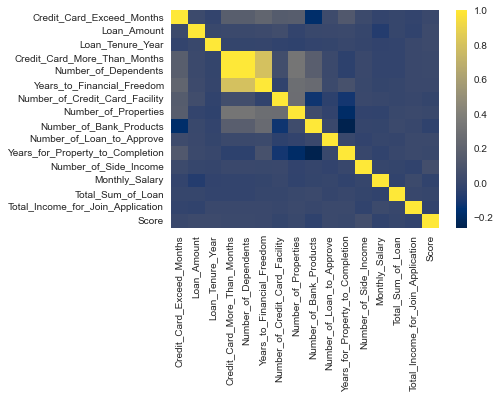

In [32]:
sns.heatmap(file.corr(),cmap="cividis")

As we can see from the heatmap, there is a strong correlation of credit card more than months and number of dependents

# **Clustering**

In [2]:
file = pd.read_csv("Bank_CreditScoring.csv")

In [3]:
from sklearn.cluster import KMeans 

X = file.drop('Score',axis = 1)
y = file['Score']#Classification need to be classes

X = pd.get_dummies(X,drop_first = True)



In [ ]:
# from sklearn.preprocessing import normalize

# # Your answer here...
# data_scaled = normalize(X)# 0 - 1
# data_scaled = pd.DataFrame(data_scaled,columns = X.columns)
# data_scaled.head()

In [ ]:
pip install kneed

In [4]:
from kneed import KneeLocator

distortions = []#initial
for i in range(2,11):
    km = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10,max_iter = 300,
        tol = 1e-04,random_state = 0
    )
    km.fit(X)
    distortions.append(km.inertia_)



In [ ]:
# from sklearn.metrics import silhouette_score

# sil = []
# kmax = 10

# # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
# for k in range(2, kmax+1):
#     km = KMeans(n_clusters = k).fit(X)
#     labels = km.labels_
#     sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
# plt.plot(range(2,11),sil,marker = 'o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

DBSCANimport pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from sklearn.datasets import make_blobs

from yellowbrick.cluster import silhouette_visualizer

In [5]:
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from sklearn.datasets import make_blobs

from yellowbrick.cluster import silhouette_visualizer

In [6]:
#file = pd.read_csv("Bank_CreditScoring.csv")

# X = file.drop('Score',axis = 1)
# y = file['Score']

# X = pd.get_dummies(X,drop_first = True)
# X
# from sklearn.preprocessing import normalize

# Your answer here...

# data_scaled = normalize(file)# 0 - 1
# data_scaled = pd.DataFrame(data_scaled,columns = file.columns)
# data_scaled.head()

from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 5,random_state = 12)
KM.fit(X)
label = KM.predict(X)

file['Label']=label

# sns.scatterplot(X['Monthly_Salary'], X['Loan_Amount'], hue=file['Score'])

In [ ]:
# kl = KneeLocator(range(2,11),distortions,curve = "convex",direction = "decreasing")
# km = KMeans(n_clusters = kl.elbow, random_state=1)
# km.fit(X)

# file= file.drop("Score", axis=1)
# file["Score"]=km.labels_
# #print(file['Score'])

# fig, axes = plt.subplots(1, 2, figsize=(13,6))

# sns.scatterplot(x="Monthly_Salary", y="Total_Income_for_Join_Application", hue="Score", data=file, ax=axes[0])
# sns.scatterplot(x="Monthly_Salary", y="Total_Income_for_Join_Application", hue="Score", data=df_new, ax=axes[1]

# **Classification 1**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# file = pd.read_csv("Bank_CreditScoring.csv")

In [ ]:
file

In [8]:
#file['Decision'] = np.where(file["Decision"] == "Accept", 1,0)
X = file.drop('Decision',axis = 1)
y = file['Decision']
#X =  X.astype(str)
cat = X.select_dtypes(include = ['object']).columns
ct = ColumnTransformer([('o',OneHotEncoder(),cat)], remainder='passthrough')
X = ct.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
# pip install category_encoders

In [ ]:
# import category_encoders as ce

# encoder = ce.OneHotEncoder(cols=['Employment_Type','More_Than_One_Products','Property_Type','State'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

['Accept' 'Accept' 'Accept' 'Accept' 'Accept']
Accuracy of SVM is 0.7602836879432624
Confusion Matrix of SVM is [[536   0]
 [169   0]]


<AxesSubplot:>

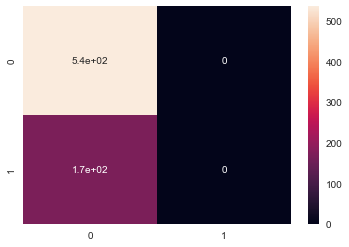

In [37]:
from sklearn.naive_bayes import GaussianNB

# Your answers here...
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
print(y_pred[:][:5])
nb.score(X_test, y_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%("SVM", acc))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of %s is %s"%("SVM", cm))

sns.heatmap(cm,annot = True)

# **Classification 2**


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.get_params()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(y_pred[:][:5])

clf.score(X_test, y_test)

['Accept' 'Accept' 'Accept' 'Accept' 'Reject']


0.6652482269503546

In [35]:
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


['Accept' 'Accept' 'Accept' 'Accept' 'Accept']
Accuracy of SVM is 0.7602836879432624
Confusion Matrix of SVM is [[536   0]
 [169   0]]


<AxesSubplot:>

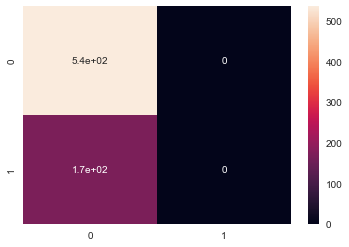

In [36]:
svm = svm.SVC(kernel = "linear")
svm = svm.fit(X_train,y_train)
y_predSVM = svm.predict(X_test)
print(y_predSVM[:][:5])
acc = accuracy_score(y_test, y_predSVM)
print("Accuracy of %s is %s"%("SVM", acc))
cm = confusion_matrix(y_test, y_predSVM)
print("Confusion Matrix of %s is %s"%("SVM", cm))

sns.heatmap(cm,annot = True)

Accuracy of Support Vector Machine and Naive Bayers are the same.However, the accuracy of decision tree is lower.